<a href="https://colab.research.google.com/github/JustKeepPlay/PyProject/blob/main/Diabetes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
import os # use commandline
from google.colab import files
import io
uploaded = files.upload()
Ddata  = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))

Saving diabetes.csv to diabetes (1).csv


In [ ]:
Ddata.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
from sklearn.preprocessing import RobustScaler ,MinMaxScaler ,StandardScaler
Sc = StandardScaler()
X = Ddata.iloc[:,0:8].values
y = Ddata.iloc[:,8].values
X= Sc.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 69)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e5e660ac0>,
      dtype=object)

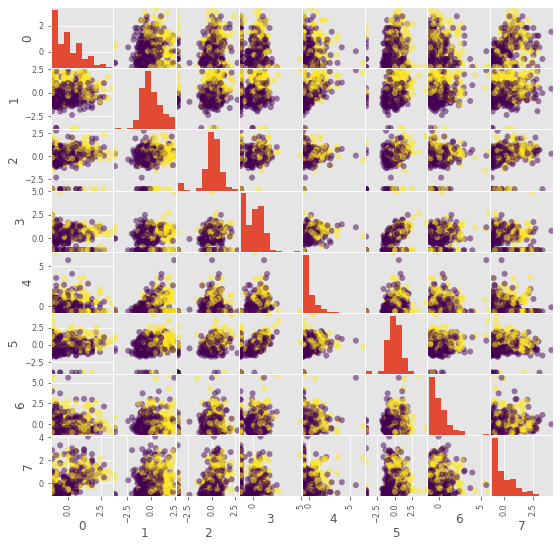

In [ ]:
import pandas as pd
Diabetes = pd.DataFrame(X_train)
pd.plotting.scatter_matrix(Diabetes, c=y_train, figsize=(9,9), marker="o") # o is marker on graph

In [ ]:
#Setup arrays to store training and test accuracies
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
neighbors = np.arange(1,10,2)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

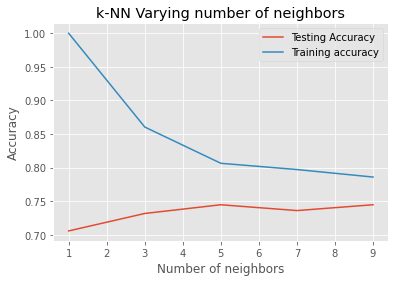

In [ ]:
#Generate plot
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

9

In [ ]:
from sklearn.metrics import classification_report
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       148
           1       0.70      0.51      0.59        83

    accuracy                           0.74       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.74      0.74      0.73       231



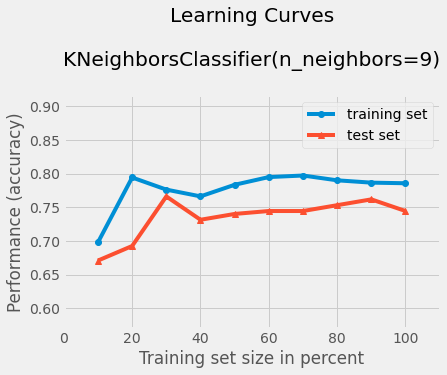

In [ ]:
#http://rasbt.github.io/mlxtend/user_guide/plotting/plot_learning_curves/
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
plot_learning_curves(X_train, y_train, X_test, y_test, knn,scoring='accuracy')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression  #https://forest-admin.forest.ku.ac.th/304xxx/?q=system/files/book/5%282018%29%20Logistic%20Regression.pdf
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  #https://www.solutioncenterminitab.com/blog/an-overview-of-discriminant-analysis/
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC #https://guopai.github.io/ml-blog08.html
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
kfold = model_selection.KFold(n_splits=10)

In [ ]:
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=9)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))


In [ ]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = model_selection.KFold(n_splits=10)
  cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

KNN: 0.728092 (0.041759)
CART: 0.700280 (0.066701)
NB: 0.750454 (0.032681)


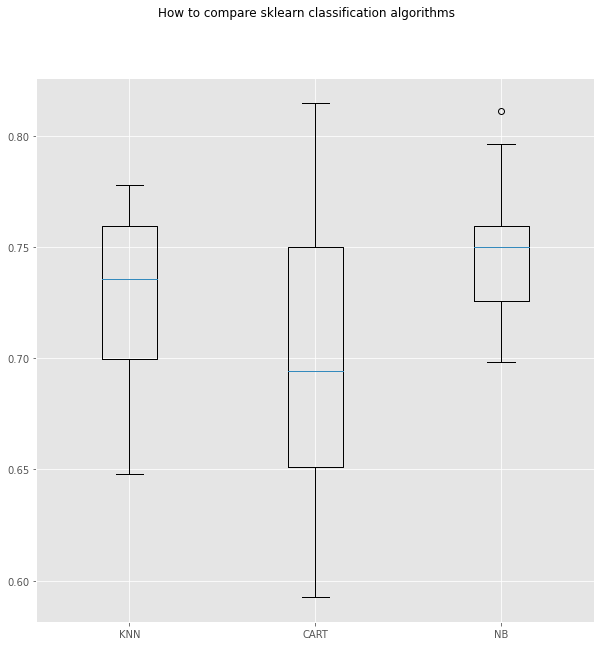

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('How to compare sklearn classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<ipython-input-118-9dba0733e6ac>:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  per = plt.bar(names, sum_results, width = 0.5, color=col_map.colors,


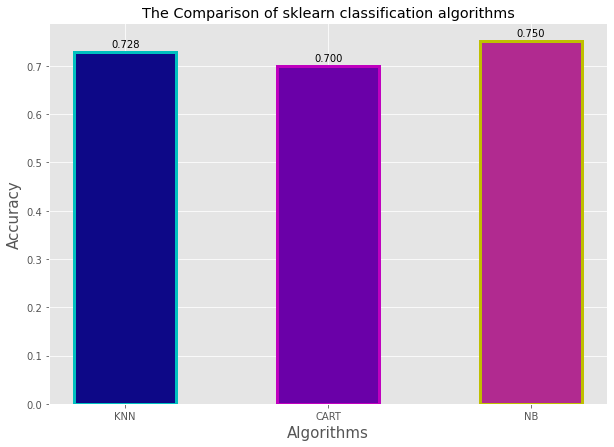

In [ ]:
import matplotlib.pyplot as plt
sum_results = np.mean(results, axis=1)
plt.figure(figsize =(10, 7))
col_map = plt.get_cmap('plasma',6)  #tab20  #plasma

per = plt.bar(names, sum_results, width = 0.5, color=col_map.colors,
        edgecolor='cmyk', linewidth=3)

#The annotate() function in pyplot module of matplotlib library is used to annotate the point xy with text s.
#show label in bar plot
for p in per:
   height = p.get_height()
   #https://matplotlib.org/stable/tutorials/text/annotations.html
   plt.annotate('{:.3f}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')


plt.xlabel('Algorithms',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.title('The Comparison of sklearn classification algorithms')
plt.show()

In [ ]:
unseen = [['1',	'85',	'66',	'29',	'0'	,'22.6'	,'0.123',	'32'	],
          ['0',	'123',	'53',	'43',	'120'	,'25.5'	,'0.456',	'15'],
          ['9',	'69',	'87',	'12',	'32'	,'21.6'	,'0.789',	'67']]
unseen_df = pd.DataFrame(unseen)
col_names = ['Pregnancies'	,'Glucose'	,'BloodPressure'	,'SkinThickness'	,'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']
unseen_df.columns=col_names
UnseenData = Sc.fit_transform(unseen_df)
modelNB =GaussianNB()
MNB = modelNB.fit(X_train,y_train)
NBpred = MNB.predict(UnseenData)
print(NBpred)


[0 1 0]
